In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [4]:
import fastai

In [5]:
from fastai.text import *
from fastai.callbacks import *

In [8]:
from textblob import TextBlob
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
data = pd.read_csv('lemessi10.csv')
data

,tweet
0,leo messi cristiano special competition among ...
1,poles stop leo messi
2,la liga goal assist king champions league top ...
3,leo messi became first player score goal diffe...
4,come tomorrow start work fenerbahçe
...,...
20099,via drawing lionel messi art lionelmessi barce...
20100,lionel messi made funny comment allegations ma...
20101,lionelmessi dont worry messi father go jail gi...
20102,lionel messi without detonating bomb


In [9]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['tweet'].apply(getSubjectivity)
data['Polarity'] = data['tweet'].apply(getPolarity)

data

,tweet,Subjectivity,Polarity
0,leo messi cristiano special competition among ...,0.586190,0.225119
1,poles stop leo messi,0.000000,0.000000
2,la liga goal assist king champions league top ...,0.766667,0.200000
3,leo messi became first player score goal diffe...,0.466667,0.125000
4,come tomorrow start work fenerbahçe,0.000000,0.000000
...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000
20102,lionel messi without detonating bomb,0.000000,0.000000


In [11]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,tweet,Subjectivity,Polarity,Analysis
0,leo messi cristiano special competition among ...,0.586190,0.225119,Positive
1,poles stop leo messi,0.000000,0.000000,Neutral
2,la liga goal assist king champions league top ...,0.766667,0.200000,Positive
3,leo messi became first player score goal diffe...,0.466667,0.125000,Positive
4,come tomorrow start work fenerbahçe,0.000000,0.000000,Neutral
...,...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000,Neutral
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000,Positive
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000,Negative
20102,lionel messi without detonating bomb,0.000000,0.000000,Neutral


In [28]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data)

In [30]:
data_lm = TextLMDataBunch.from_df('.', train,val,text_cols='tweet',label_cols='Analysis')

In [31]:
data_lm.save()

In [32]:
# Classifier model data
data_clas  = TextClasDataBunch.from_df('.', train_df=train,text_cols='tweet',label_cols='Analysis',valid_df=val,vocab=data_lm.train_ds.vocab)

C:\Users\ugure\Anaconda3\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.save()

In [34]:
data_clas.show_batch()

C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\ugure\Anaconda3\lib\site-packages\fastai\text\data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos messi if they are stars you are the king of the sky come fenerbahçe messi the biggest star milky way galaxy ever seen success new journey goat messi king thanks barça messi i collected good matches memories thanks lot see new team it year everything said impossible lionel messi leaving barcelona xxwrep 4 messi angara messi,Positive
xxbos an interesting coincidence took place draw taking place uefa champions league competition lionel messi cristiano ronaldo lasted years la liga real madrid barcelona jerseys moved champions league barcelona juventus ronaldo messi uefa champions league,Positive
xxbos messi agreement another team friends hear team malatya sports great president crisp water career messi spain last details discussing transfer bitter also great president italain go agreement ronaldo housing news first us turkiyede team,Positive
xxbos avril bedding set cotton duvet cover x cm elastic bed sheet x cm volatile pillowcase x cm pieceenglishhome duvet trade export import textile homedecor interior ajax milano autumn winter hotel hotel textile messi madamecoco,Neutral
xxbos think eran zahavi comes fenerbahçe mic saturday sunday monday wednesday thursday good morning bismillah allah dollar euro gold announced yks preferred preferences osym lionel messi cristiano ronaldo barcelona manchester city leave left justice,Positive


In [35]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.10E-01


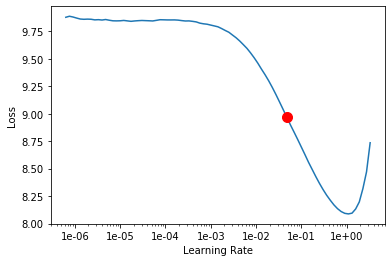

In [36]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(2, 5.75E-02,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.484817,5.030419,0.223568,07:16
1,5.108631,4.531376,0.275670,08:05


Better model found at epoch 0 with valid_loss value: 5.03041934967041.
Better model found at epoch 1 with valid_loss value: 4.531375885009766.


In [38]:
learn.save('fit_head')

In [39]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-04


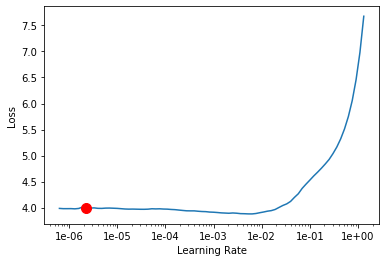

In [40]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [41]:
learn.fit_one_cycle(3,3.98E-04,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.850815,4.379399,0.297768,10:35
1,3.667266,4.239293,0.318917,10:10
2,3.514750,4.214545,0.323121,10:08


Better model found at epoch 0 with valid_loss value: 4.379398822784424.
Better model found at epoch 1 with valid_loss value: 4.239292621612549.
Better model found at epoch 2 with valid_loss value: 4.214544773101807.


In [42]:
learn.load('best_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (15078 items)
x: LMTextList
xxbos lionelmessi longtime antonella roccuzzo enter world house next year,xxbos leo messi criticize win match matter barceloa,xxbos i want last song brother last song possibility say dying messi,xxbos i could understand uploaded result match single person matter whether ronaldo messi straight football player football team game can not alone barcabayern messi barcelona ronaldo,xxbos after long negotiations leo messi gave money recruit barcelona marca
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (5026 items)
x: LMTextList
xxbos after record signed say records left broken messi continues reach new records,xxbos cristiano ronaldo world number cristiano ronaldo world number cristiano ronaldo,xxbos story should nt end like messi,xxbos unfortunately l leo messi barcelona turkey season match good opportunity future born whether play turkish team,xxbos come besiktas messi
y: LMLabelList
,,,,
Path: .;

Test: No

In [43]:
learn.save_encoder('AIBoot_enc')

In [44]:
learn1 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [45]:
learn1.load_encoder('AIBoot_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15078 items)
x: TextList
xxbos lionelmessi longtime antonella roccuzzo enter world house next year,xxbos leo messi criticize win match matter barceloa,xxbos i want last song brother last song possibility say dying messi,xxbos i could understand uploaded result match single person matter whether ronaldo messi straight football player football team game can not alone barcabayern messi barcelona ronaldo,xxbos after long negotiations leo messi gave money recruit barcelona marca
y: CategoryList
Neutral,Positive,Neutral,Negative,Negative
Path: .;

Valid: LabelList (5026 items)
x: TextList
xxbos after record signed say records left broken messi continues reach new records,xxbos cristiano ronaldo world number cristiano ronaldo world number cristiano ronaldo,xxbos story should nt end like messi,xxbos unfortunately l leo messi barcelona turkey season match good opportunity future born whether play turkish team,xxbos come besiktas messi
y: Cat

In [46]:
learn1.lr_find()

epoch,train_loss,valid_loss,accuracy,time


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02
Min loss divided by 10: 3.63E-02


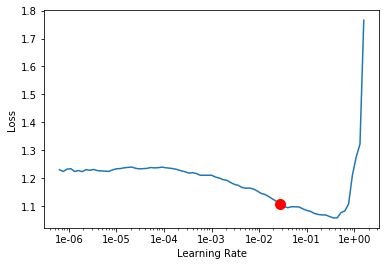

In [47]:
learn1.recorder.plot(suggestion=True)

In [48]:
best_clf_lr = learn1.recorder.min_grad_lr
best_clf_lr

0.027542287033381692

In [49]:
learn1.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.764529,0.672053,0.719658,06:13


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [50]:
learn1.freeze_to(-2)

In [51]:
learn1.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.562115,0.435192,0.848388,07:41


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [52]:
learn1.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 9.12E-04


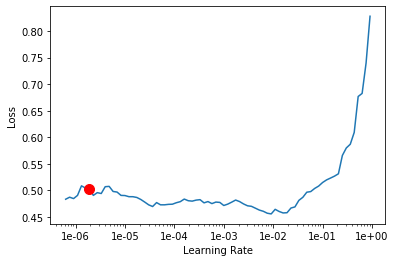

In [53]:
learn1.lr_find()
learn1.recorder.plot(suggestion=True)

In [54]:
learn1.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.299959,0.225419,0.936530,15:30
1,0.175766,0.113974,0.973737,15:12
2,0.067413,0.103542,0.975129,14:00


C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\ugure\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r

In [55]:
learn1.show_results()

text,target,prediction
xxbos messi took pass xxunk boateng mes feet xxunk xxunk messi faced goalkeeper xxunk xxrep 4 a g xxrep 10 o xxrep 6 l mess xxrep 4 i first destroyed xxunk xxunk leo messi great detail xxunk football trick,Positive,Positive
xxbos mess agreement another team friends hear us team malatya sports great president crisp water career xxunk final details mess spain transfer bitter also agreement everything great president italain go ronaldo news first turkiyede team,Positive,Positive
xxbos an interesting coincidence took place draw taking place uefa champions league competition lionel messi cristiano ronaldo lasted years la liga real madrid barcelona jerseys moved champions league barcelona juventus ronaldo messi uefa champions league,Positive,Positive
xxbos messi agreement another team friends hear team malatya sports great president crisp water career messi spain last details discussing transfer bitter also great president italain go agreement ronaldo housing news first us turkiyede team,Positive,Positive
xxbos xbetpromo code bonus football sports футбол betting unibet africa afrique freebet btc matchday tips inplay bundesliga bet cristiano messi streamacademy bwin wasexo melbet chelsea pl laliga fb bet odds bettingtips africa news,Neutral,Neutral
